HOME CREDIT SCORE CARD MODEL


1. Problem yang Ingin Diselesaikan
Meningkatkan Keputusan Pemberian Pinjaman
Mengidentifikasi faktor-faktor yang mempengaruhi keputusan pemberian pinjaman.
Menyelidiki pola dan tren pada data pelamar pinjaman.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/application_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/application_test.csv')

In [3]:
# Tujuan Analisis
# Tujuan utama analisis ini adalah untuk meningkatkan keputusan pemberian pinjaman dengan memahami faktor-faktor yang mempengaruhi tingkat keberhasilan pinjaman.

# Langkah-langkah berikutnya...

Data Pre-Processing (Step 2)

In [7]:
# Insight 1: Pengaruh Pekerjaan Terhadap Keputusan Pemberian Pinjaman
occupation_insight = train_data.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

In [8]:
# Insight 2: Korelasi Antara Pendidikan dan Keberhasilan Pinjaman
education_insight = train_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

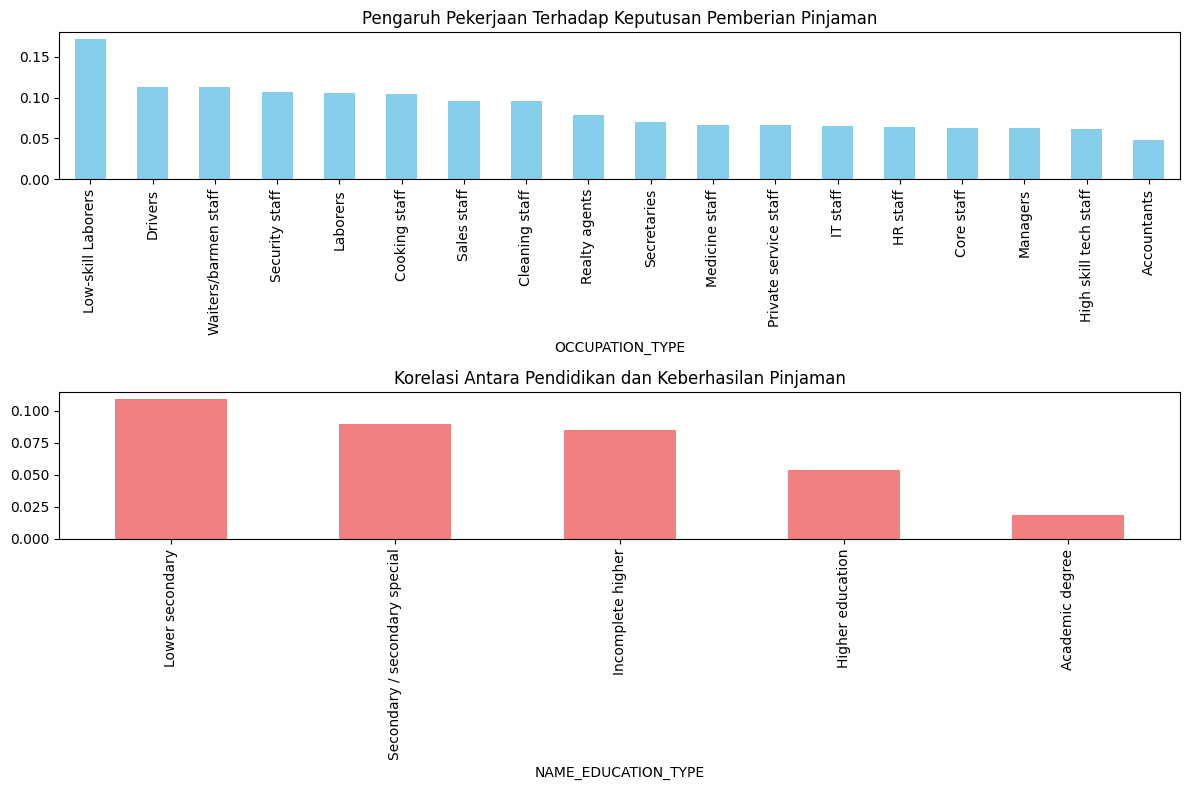

In [9]:
# Menampilkan Grafik
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
occupation_insight.plot(kind='bar', color='skyblue')
plt.title('Pengaruh Pekerjaan Terhadap Keputusan Pemberian Pinjaman')

plt.subplot(2, 1, 2)
education_insight.plot(kind='bar', color='lightcoral')
plt.title('Korelasi Antara Pendidikan dan Keberhasilan Pinjaman')

plt.tight_layout()
plt.show()

dari grafik ini dapat dilihat peminjan berdasarkan pekerjaan lebih tinggi berasal dari pekerja berketerampilan rendah dan berasal dari pendidikan menengah kebawah

Pola dan Tren pada Data Pelamar Pinjaman

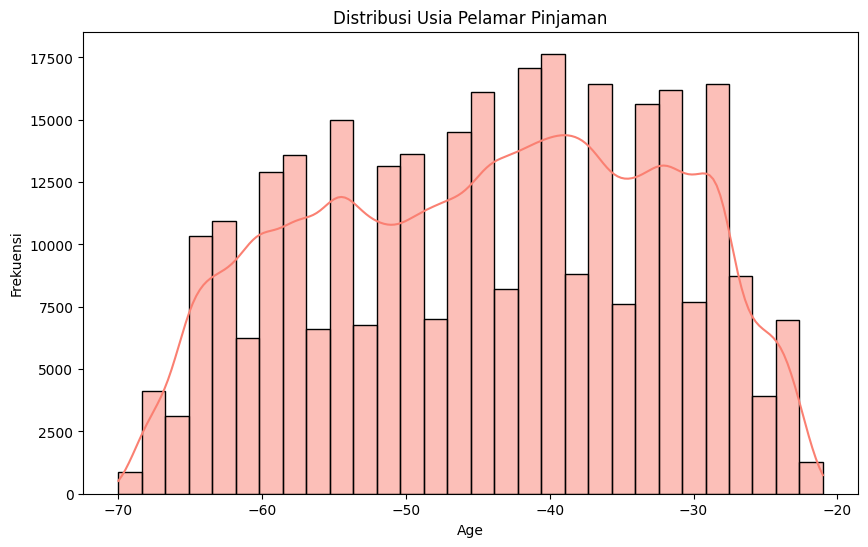

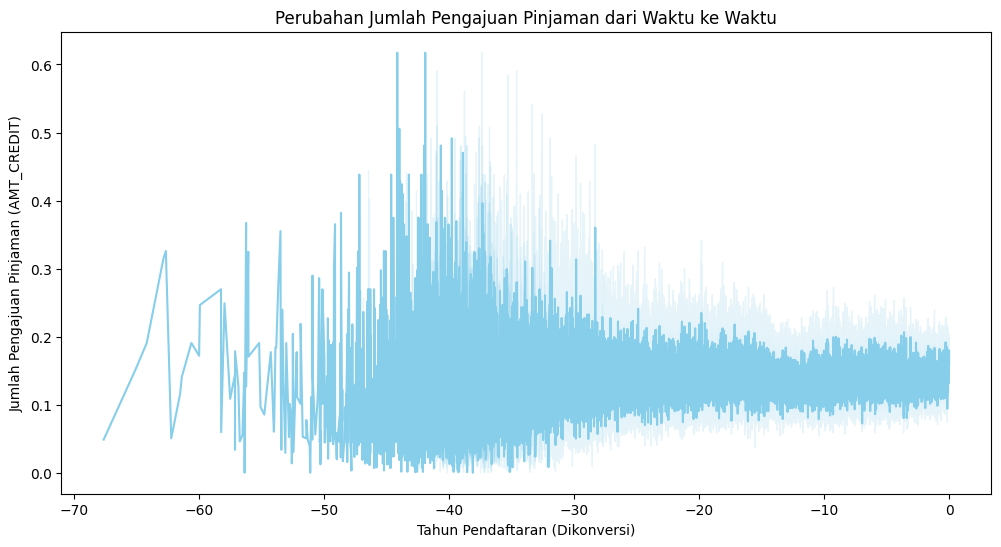

In [14]:
# Insight 3: Distribusi Usia Pelamar Pinjaman
plt.figure(figsize=(10, 6))
sns.histplot(train_data['DAYS_BIRTH'] // 365, bins=30, kde=True, color='salmon')
plt.title('Distribusi Usia Pelamar Pinjaman')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

# Insight 4: Perubahan Jumlah Pengajuan Pinjaman dari Waktu ke Waktu
plt.figure(figsize=(12, 6))
train_data['DAYS_REGISTRATION_YEAR'] = train_data['DAYS_REGISTRATION'] / 365
sns.lineplot(x='DAYS_REGISTRATION_YEAR', y='AMT_CREDIT', data=train_data, color='skyblue')
plt.title('Perubahan Jumlah Pengajuan Pinjaman dari Waktu ke Waktu')
plt.xlabel('Tahun Pendaftaran (Dikonversi)')
plt.ylabel('Jumlah Pengajuan Pinjaman (AMT_CREDIT)')
plt.show()

Data Cleaning

Detecting and remove data duplicate

In [17]:
dt=test_data.duplicated().sum()

In [18]:
df=train_data.duplicated().sum()

Detecting missing value

In [20]:
count_nv = pd.DataFrame(train_data.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Data'] / len(train_data)) * 100
count_nv[count_nv['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage
86,FONDKAPREMONT_MODE,210295,68.386172
89,WALLSMATERIAL_MODE,156341,50.840783
87,HOUSETYPE_MODE,154297,50.176091
90,EMERGENCYSTATE_MODE,145755,47.398304


In [24]:
data = list(count_nv[count_nv['Percentage'] > 40]['index'])
train_data = train_data.drop(columns=data)
train_data = train_data.drop(columns='SK_ID_CURR')
count_nv = pd.DataFrame(train_data.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Data'] / len(train_data)) * 100
still_null = count_nv[count_nv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)
a = list(still_null['index'])

# Mengatasi nilai-nilai yang hilang
for i in a:
    data = train_data[i]
    types = str(data.dtype)
    if types == 'object':
        train_data[i].fillna(train_data[i].mode()[0], inplace=True)
    else:
        train_data[i].fillna(train_data[i].median(), inplace=True)

# Cek kembali nilai-nilai yang hilang
count_nv = pd.DataFrame(train_data.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Data'] / len(train_data)) * 100
count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage


In [28]:
# Encoding Categorical Variables
def encode_categorical_variables(train_data):
    # Assuming 'categorical_columns' contains the list of categorical columns
    for column in categorical_columns:
        le = LabelEncoder()
        train_data[column] = le.fit_transform(df[column])
        encode_categorical_variables(train_data)

Feature Engineering

In [29]:
# Feature Engineering
x = train_data.drop(columns = 'TARGET')

Numeric data type

In [31]:
num = x.select_dtypes(exclude='object')
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION_YEAR
0,0,0.001512,0.090287,0.090032,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,-9.994521
1,0,0.002089,0.311736,0.132924,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-3.249315
2,0,0.000358,0.022472,0.020025,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-11.671233
3,0,0.000935,0.066837,0.109477,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,-26.939726
4,0,0.000819,0.116854,0.078975,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-11.810959


Change the negative value on column to positive value

In [32]:
negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column] * -1
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION_YEAR
0,0,0.001512,0.090287,0.090032,351000.0,0.018801,9461,637,3648.0,2120,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,9.994521
1,0,0.002089,0.311736,0.132924,1129500.0,0.003541,16765,1188,1186.0,291,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,3.249315
2,0,0.000358,0.022472,0.020025,135000.0,0.010032,19046,225,4260.0,2531,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,11.671233
3,0,0.000935,0.066837,0.109477,297000.0,0.008019,19005,3039,9833.0,2437,...,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,26.939726
4,0,0.000819,0.116854,0.078975,513000.0,0.028663,19932,3038,4311.0,3458,...,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,11.810959


In [33]:
# Look for a numeric data type that has a unique value > 2
train_data_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
train_data_num = train_data_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(train_data_num.Name_of_column):
    if train_data_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

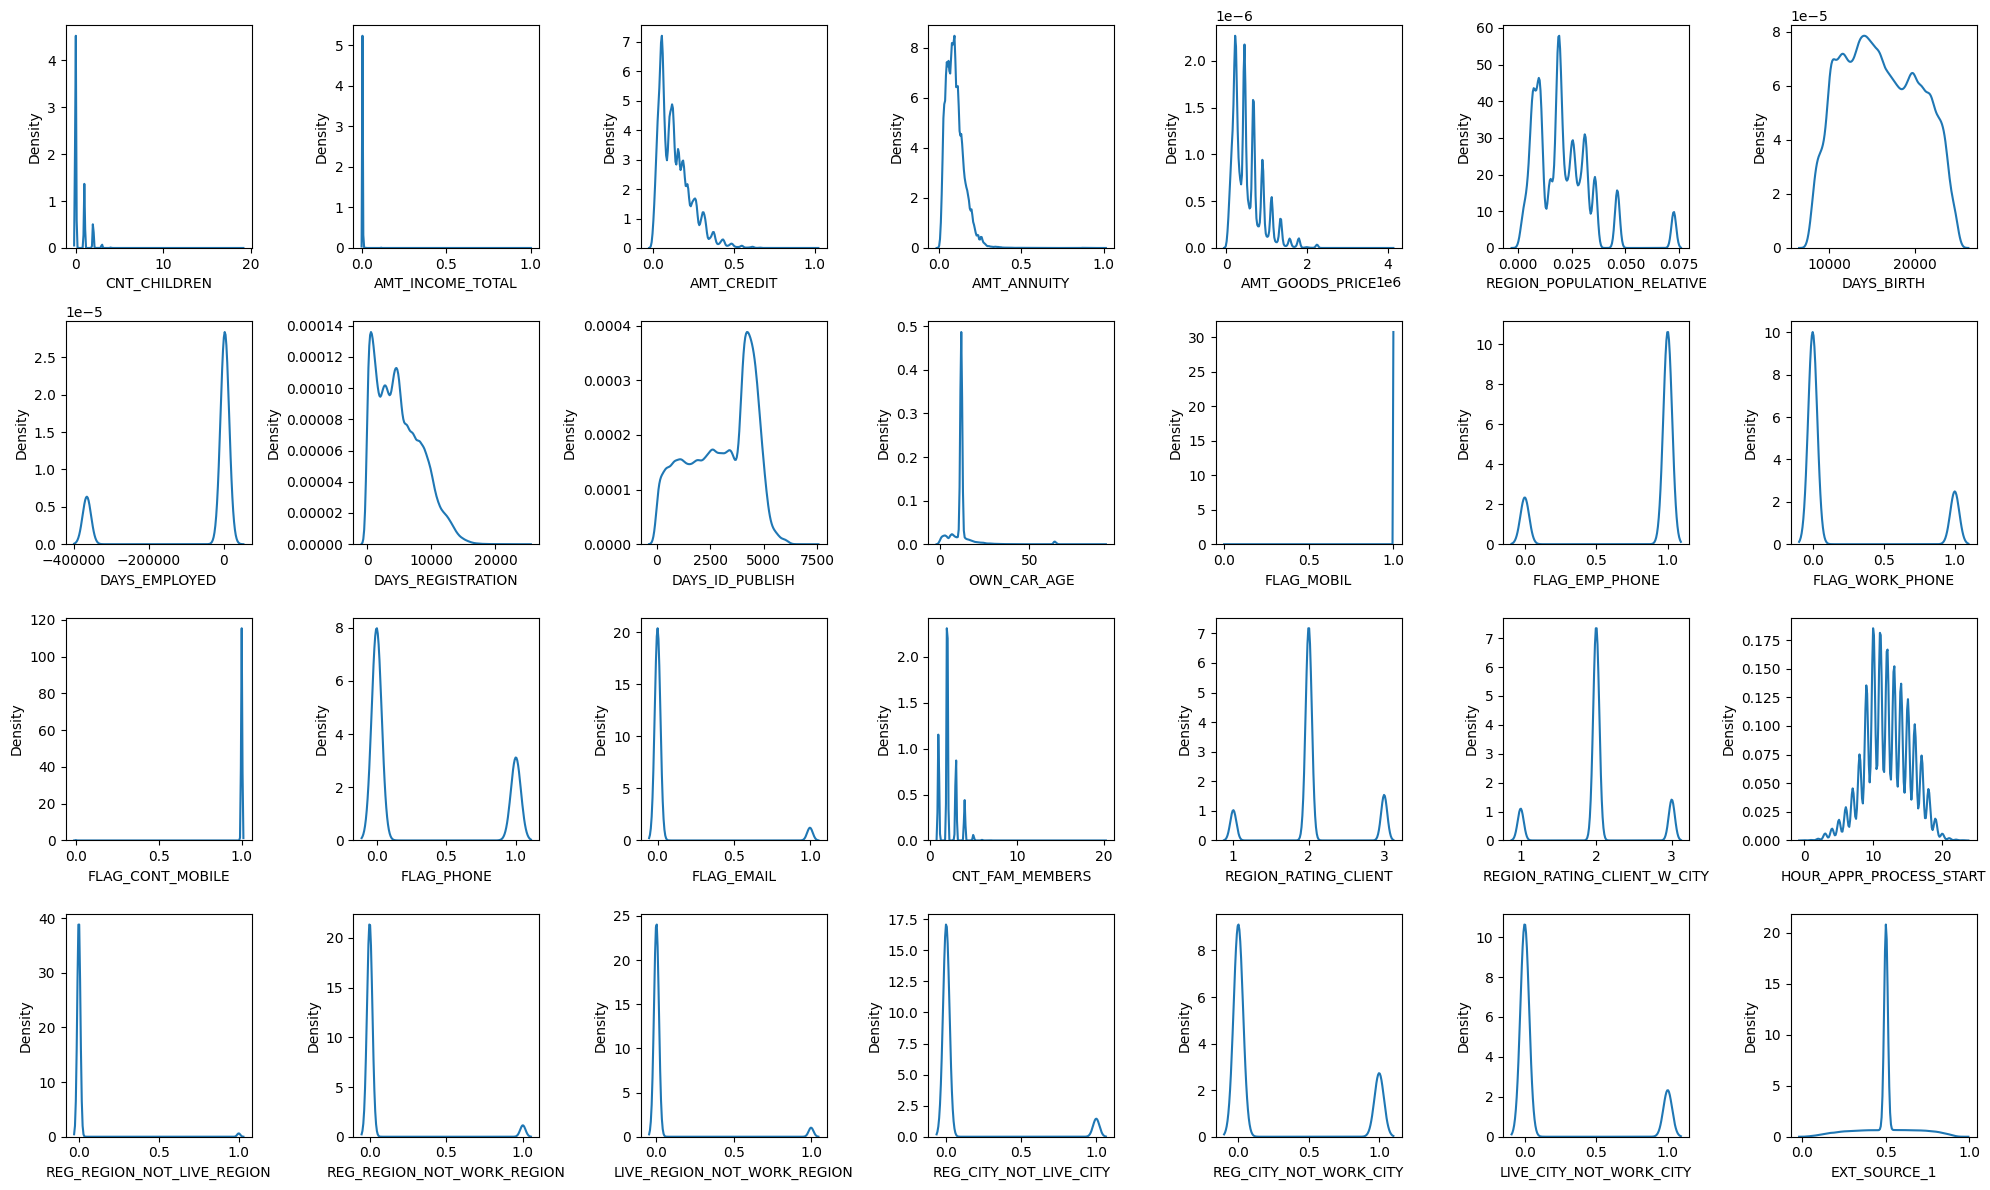

In [34]:
# Look at the distribution of data
plt.figure(figsize=(20,12))

# Assuming num_a is a list of numerical column names
num_a = num.columns[:28]  # Select the first 28 numerical columns

for i, column in enumerate(num_a, 1):
    plt.subplot(4, 7, i)
    sns.kdeplot(data=num, x=num[column])
    plt.tight_layout()

plt.show()

Dalam visualisasi ini, warna yang lebih gelap menunjukkan densitas yang lebih tinggi, sedangkan warna yang lebih ringan menunjukkan densitas yang lebih rendah. Hal ini membantu menunjukkan bagian mana dari distribusi data yang memiliki konsentrasi tinggi atau rendah. Selain itu, garis sumbu vertikal dan horizontal membantu menunjukkan nilai maksimum dan minimum dari setiap variabel.

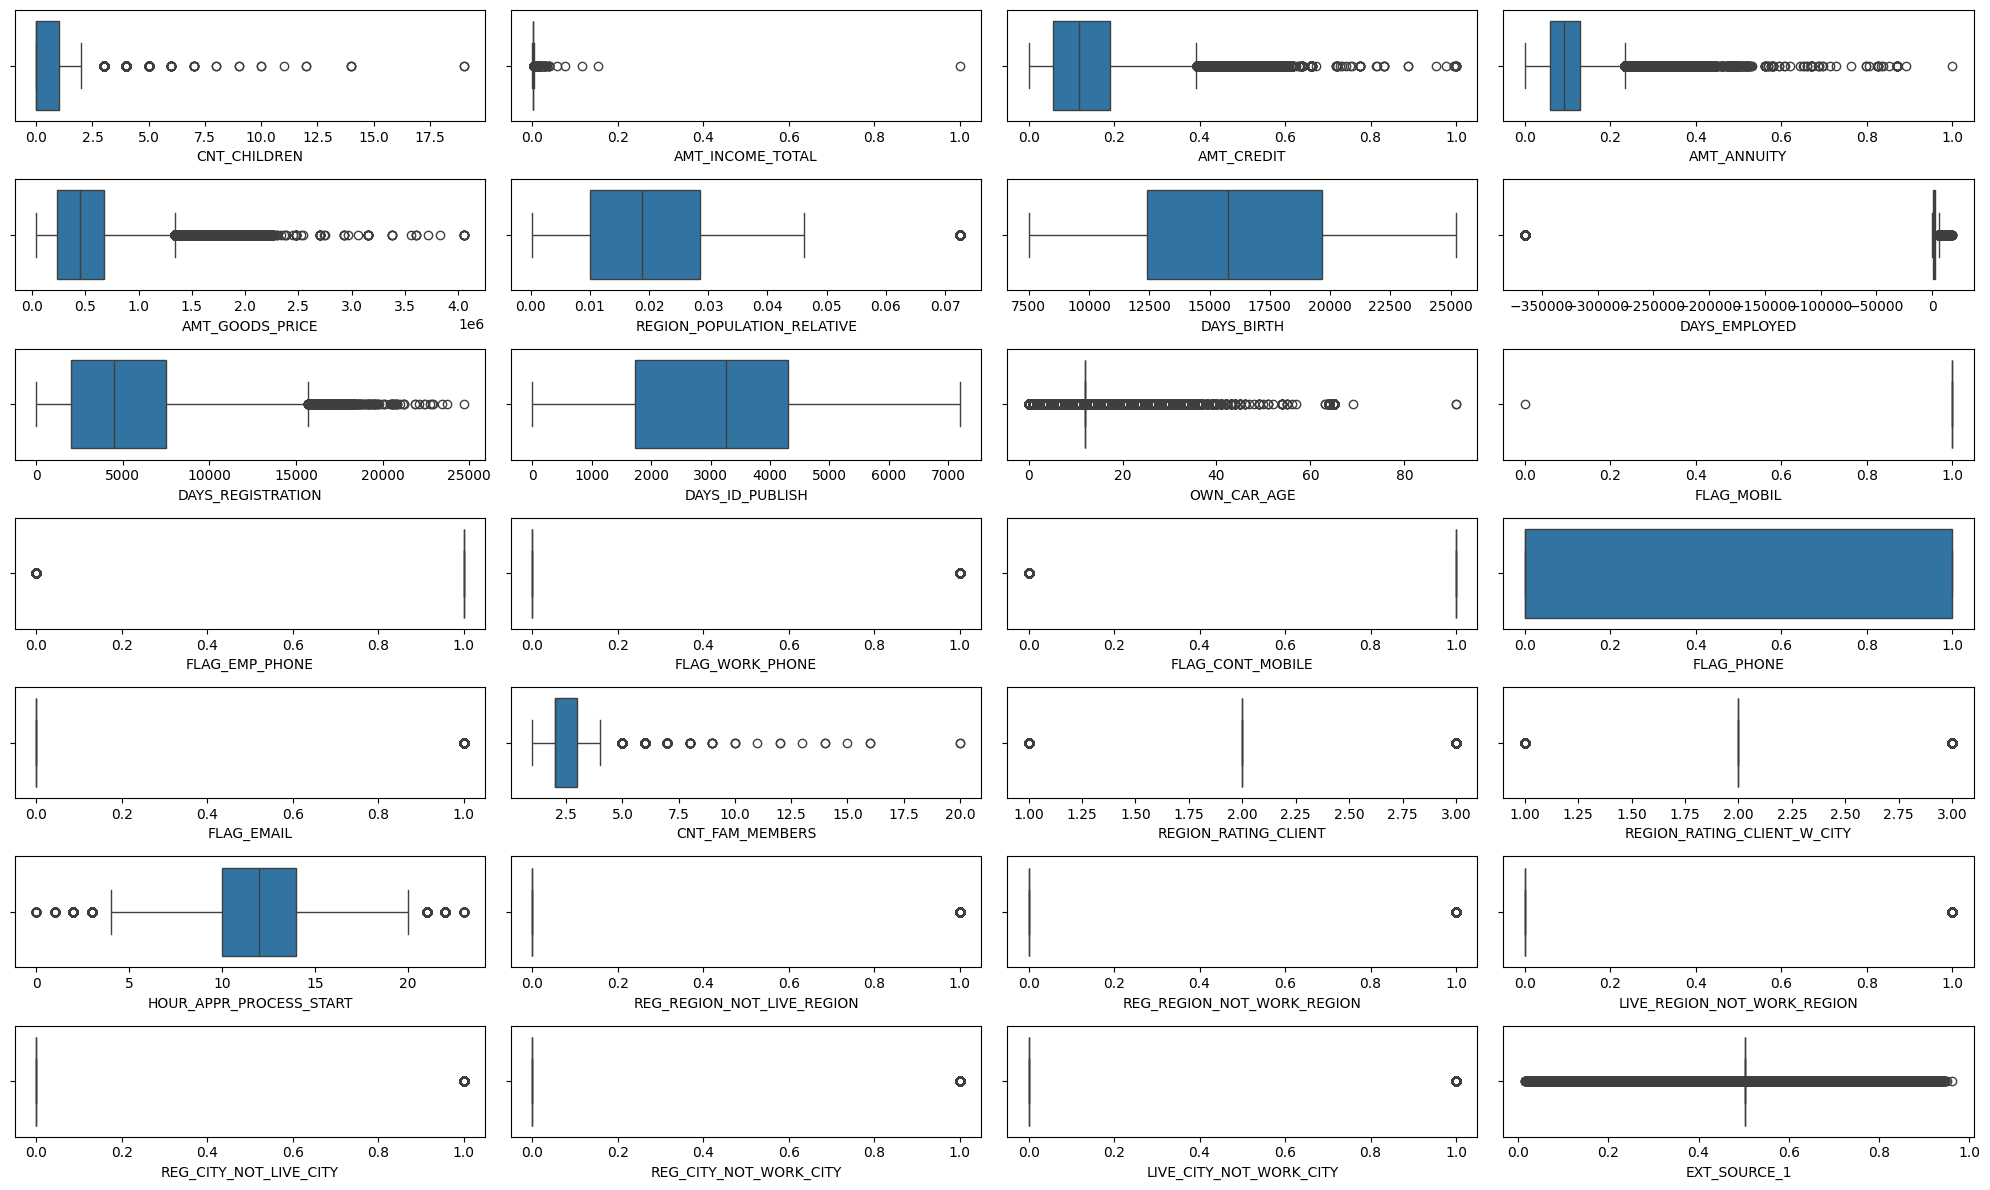

In [35]:
plt.figure(figsize=(20,12))
# Assuming num_a is a list of numerical column names
num_a = num.columns[:28]  # Select the first 28 numerical columns
for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

plt.show()

Grafik di atas menunjukkan hubungan antara dua variabel dengan menggunakan representasi titik pada sumbu koordinat horizontal dan vertikal. Dari pola titik yang terlihat, kita dapat menemukan hubungan positif atau negatif antara kedua variabel. Namun, sebagaimana telah disebut sebelumnya, tanpa data asli dan konteks, kesimpulan yang lebih detail mungkin sulit untuk ditetapkan.

Remove Outlier

In [38]:
import numpy as np
from scipy import stats

print(f'Row before delete outlier at CNT_children: {len(train_data)}')

filtered_entries = np.array([True] * len(train_data))

zscore = abs(stats.zscore(train_data['CNT_CHILDREN']))  # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries  # keep yang kurang dari 3 absolute z-scorenya

train_data = train_data[filtered_entries]  # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children: {len(train_data)}')

Row before delete outlier at CNT_children: 307511
Row after delete outlier at CNT_children: 303239


Feature Transformation

In [39]:
x = train_data.drop(columns = 'TARGET', axis=1)
num = x[num_a]
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1
0,-0.589198,0.141631,-0.477744,-0.165352,-0.507190,-0.150759,1.509510,-0.459710,0.385831,0.577304,...,-0.101497,-0.061058,-0.632857,-0.124369,-0.231455,-0.2059,-0.29128,-0.545476,-0.465770,-3.005051
1,-0.589198,0.424753,1.725509,0.594208,1.600556,-1.253789,-0.158701,-0.463592,1.083617,1.789288,...,-2.066499,-2.051288,-0.326703,-0.124369,-0.231455,-0.2059,-0.29128,-0.545476,-0.465770,-1.369951
2,-0.589198,-0.424615,-1.152447,-1.405076,-1.091998,-0.784603,-0.679674,-0.456807,0.212377,0.304955,...,-0.101497,-0.061058,-0.939011,-0.124369,-0.231455,-0.2059,-0.29128,-0.545476,-0.465770,-0.002563
3,-0.589198,-0.141492,-0.711048,0.178998,-0.653392,-0.930108,-0.670310,-0.476632,-1.367137,0.367244,...,-0.101497,-0.061058,1.510219,-0.124369,-0.231455,-0.2059,-0.29128,-0.545476,-0.465770,-0.002563
4,-0.589198,-0.198116,-0.213418,-0.361147,-0.068584,0.562091,-0.882034,-0.476625,0.197922,-0.309320,...,-0.101497,-0.061058,-0.326703,-0.124369,-0.231455,-0.2059,-0.29128,1.833254,2.146974,-0.002563


Object data type

Feature Transformation

In [40]:
obj = x.select_dtypes(include='object')
train_data_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
train_data_obj = train_data_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(train_data_obj.Name_of_column):
    if train_data_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


One hot encoding

In [41]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)

obj = obj.drop(columns = obj_1)

Label Encoding

In [43]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat] = label_encoder.fit_transform(obj[cat])

obj

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train Logistic Regression Model

In [71]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/application_train.csv')

# Handling missing values if needed
# df = df.dropna()  # Uncomment this line if you want to drop rows with missing values

# Pilih fitur yang akan digunakan (contoh: fitur-fitur numerik)
features = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Pisahkan data menjadi fitur (X) dan target (y)
X = df[features]
y = df['TARGET']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre-processing: Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Regresi Logistik
logreg_model = LogisticRegression(random_state=42)

# Replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Identify and handle missing values in X_train_scaled and X_test_scaled
missing_rows_train = pd.DataFrame(X_train_scaled).isnull().any(axis=1)
missing_rows_test = pd.DataFrame(X_test_scaled).isnull().any(axis=1)


# Identify and handle missing values in X_train_scaled and X_test_scaled
missing_rows_train = pd.DataFrame(X_train_scaled).isnull().any(axis=1)
missing_rows_test = pd.DataFrame(X_test_scaled).isnull().any(axis=1)

# Convert boolean series to index
missing_rows_train_index = missing_rows_train.index
missing_rows_test_index = missing_rows_test.index


# Latih model pada data latih
logreg_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred = logreg_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9195323805342829
Confusion Matrix:
[[56554     0]
 [ 4949     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Initialize XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
# Importing precision_score from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.9195161211648212
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.6138584081377263
